# Project: Ham vs. Spam (Text Classification)

## Overview
In this project you will build a machine learning model that predicts whether a text message is **ham** (normal) or **spam** (unwanted/advertising/scam). This is one of the most common “real world” classification problems and is a great way to practice the full data science workflow.

You will work with a labeled dataset of SMS messages and train a model using features created from text (for example: **bag-of-words** or **TF–IDF**).

## Optimization

- Utilizing the two baseline models, I performed several tests on text vectorization transformer using 5-fold cross validation on the training set. 
    - Enabling bi- and tri-grams using n_grams provided a minor improvement on precision. Precision improved from 0.918 to 0.94 - slightly better than 0.5-sigma.
    - TF-IDF vectorization performed slightly worse on decision tree and significantly worse on logistic regression. Enabling stop_words on TF-IDF further degraded performance.
    - As a negative control, I disabled stop words and found that decision tree performed slightly worse but logistic regression slightly improved - both well less than 1-sigma of effect. Going a step further, removing the text cleaning and reverting to the original text column lead to improvement on the logistic regression of 0.7-sigma. This is surprising and if I had to guess, is due to the sloppy mix of vernacular, shorthand, and typos in the corpus and I do not think this would lead to improvement in other datasets.
    - Utilizing n_grams does not trigger any new entries in the top 50 word lists (corpus nor spam), but n_grams have appeared in the top features for our baseline models: free sms, free wan help, just text, fraction cost reply, new message, message waiting, place send free

| Vectorization Strategy | Decision Tree (20) | Logistic Regression (0.5, balanced) |
| ---------------------- | :----------------: | :---------------------------------: |
| Baseline               | 0.918 +/- 0.028    | 0.925 +/- 0.034                     |
| n_grams(1,2)           | 0.939 +/- 0.026    | 0.940 +/- 0.034                     |
| **n_grams(1,3)**       | 0.940 +/- 0.021    | 0.945 +/- 0.033                     |
| TF-IDF (w/o stop words)| 0.903 +/- 0.019    | 0.805 +/- 0.036                     |
| TF-IDF (w/  stop words)| 0.900 +/- 0.025    | 0.758 +/- 0.036                     |
| Disable Stopwords      | 0.907 +/- 0.012    | 0.931 +/- 0.029                     |
| Skip Text Cleaning     | 0.915 +/- 0.017    | 0.948 +/- 0.024                     |

<p style="text-align:center;"><i>Mean +/- stdev after 5-fold cross validation on training set. Bold indicates selected method.</i></p>

- After incorporating tri-grams into my standard pipeline, I selected several ensemble methods representing both bagging and boosting strategies.
    - Random Forest performed perfectly for precision, but was among one of the worst performers for recall.
    - K-nearest neighbors had the 2nd best score for precision, but was unacceptably bad for recall.
    - Gradient Boosting and XGBoost both performed well. Without optimization, gradient boost outperformed on precision at the expense of recall, while XGBoost was more balanced between the two scores.
    - I did a quick round of hyperparameter tuning on the top two models but could not significantly improve either model.


 | Model Args           | Precision | Recall | F1 Score | Accuracy | Train - F1 Score |
 | -------------------- | :-------: | :----: | :------: | :------: | :--------------: |
 | AdaBoostClassifier   | 0.948 +/- 0.017 | 0.856 +/- 0.027 | 0.899 +/- 0.019 | 0.974 +/- 0.005 | 1.000 +/- 0.000 | 
 | BaggingClassifier    | 0.938 +/- 0.013 | 0.793 +/- 0.022 | 0.859 +/- 0.016 | 0.965 +/- 0.004 | 0.951 +/- 0.005 | 
 | DecisionTree         | 0.933 +/- 0.016 | 0.802 +/- 0.008 | 0.863 +/- 0.010 | 0.966 +/- 0.003 | 0.949 +/- 0.003 | 
 | **GradientBoosting** | 0.971 +/- 0.008 | 0.743 +/- 0.026 | 0.842 +/- 0.019 | 0.963 +/- 0.004 | 0.927 +/- 0.005 | 
 | KNeighbors           | 0.977 +/- 0.032 | 0.275 +/- 0.022 | 0.429 +/- 0.029 | 0.902 +/- 0.004 | 0.554 +/- 0.018 | 
 | LogisticRegression   | 0.955 +/- 0.010 | 0.866 +/- 0.015 | 0.909 +/- 0.006 | 0.977 +/- 0.001 | 0.997 +/- 0.001 | 
 | **RandomForest**     | 1.000 +/- 0.000 | 0.725 +/- 0.022 | 0.841 +/- 0.015 | 0.963 +/- 0.003 | 1.000 +/- 0.000 | 
 | XGBClassifier        | 0.960 +/- 0.012 | 0.822 +/- 0.020 | 0.886 +/- 0.010 | 0.972 +/- 0.002 | 0.964 +/- 0.006 | 
 
<p style="text-align:center;"><i>Mean +/- stdev after 5 random Test-Train-Split runs. Bold indicates selected models.</i></p>

 | Model Args      | Precision | Recall | F1 Score | Accuracy | Train - F1 Score |
 | --------------- | :-------: | :----: | :------: | :------: | :--------------: |
 | RandomForestClassifier(n_estimators=250)                         | 1.000 | 0.754 | 0.860 | 0.967 | 1.000 | 
 | **RandomForestClassifier(max_depth=100, n_estimators=250)**      | 1.000 | 0.706 | 0.828 | 0.961 | 0.984 | 
 | RandomForestClassifier(max_depth=75, n_estimators=250)           | 1.000 | 0.706 | 0.828 | 0.961 | 0.948 | 
 | RandomForestClassifier(max_depth=50, n_estimators=250)           | 1.000 | 0.647 | 0.786 | 0.953 | 0.889 | 
 | RandomForestClassifier(max_depth=25, n_estimators=250)           | 1.000 | 0.374 | 0.545 | 0.916 | 0.675 | 
 | RandomForestClassifier(max_depth=20, n_estimators=250)           | 1.000 | 0.299 | 0.461 | 0.906 | 0.566 | 
 | RandomForestClassifier(max_depth=15, n_estimators=250)           | 1.000 | 0.166 | 0.284 | 0.888 | 0.341 |

<p style="text-align:center;"><i>Raw scores from parameter skew on Random Forest. Bold indicates selected model.</i></p>

 | Model Args      | Precision | Recall | F1 Score | Accuracy | Train - F1 Score |
 | --------------- | :-------: | :----: | :------: | :------: | :--------------: |
 | GradientBoostingClassifier(max_depth=50, n_estimators=250)       | 0.938 | 0.807 | 0.868 | 0.967 | 1.000 | 
 | GradientBoostingClassifier(max_depth=25, n_estimators=250)       | 0.940 | 0.834 | 0.884 | 0.971 | 1.000 | 
 | GradientBoostingClassifier(max_depth=20, n_estimators=250)       | 0.940 | 0.840 | 0.887 | 0.971 | 1.000 | 
 | **GradientBoostingClassifier(max_depth=15, n_estimators=250)**   | 0.940 | 0.840 | 0.887 | 0.971 | 1.000 | 
 | GradientBoostingClassifier(max_depth=10, n_estimators=250)       | 0.951 | 0.834 | 0.889 | 0.972 | 1.000 | 

<p style="text-align:center;"><i>Raw scores from parameter skew on GradientBoosting. Bold indicates selected model.</i></p>

- I performed a final model stability test on our baseline and leading models. Random Forest recall performance was still middling. I returned to vectorization parameters and found that turning off n_grams significantly improved recall on random forest - by ~4-sigma.
- In its final form, random forest is performing with a precision score of 0.996 - just one false postive for every 249 true positives - while recall performance is also meeting goal with 82.4% of spam messages being flagged. While some spam messages will go through, this can be somewhat mitigated by UI design.
- The finding that the original text outperforms cleaned text shows that there is still work to be done in cleaning the text, especially since when the corpus is so messy with abbreviations and typos.

 | Vectorize | Model    | Args           | Precision *(>0.99)* | Recall *(>0.8)* | F1 Score | Accuracy | Train - F1 Score |
 | --------- | -------- | -------------- | :-------: | :----: | :------: | :------: | :--------------: |
 | Trigrams | DecisionTree | max_depth=20 | 0.920 +/- 0.018 | **0.811 +/- 0.020** | 0.862 +/- 0.013 | 0.965 +/- 0.003 | 0.949 +/- 0.004 | 
 | Trigrams | GradientBoosting | max_depth=20 | 0.950 +/- 0.010 | **0.842 +/- 0.020** | 0.893 +/- 0.009 | 0.973 +/- 0.002 | 1.000 +/- 0.000 | 
 | Trigrams | LogisticRegression | C=0.5, 'balanced' | 0.952 +/- 0.015 | **0.879 +/- 0.013** | 0.914 +/- 0.010 | 0.978 +/- 0.003 | 0.997 +/- 0.001 | 
 | Trigrams | RandomForest | max_depth=100 | **0.999 +/- 0.005** | 0.740 +/- 0.025 | 0.850 +/- 0.018 | 0.965 +/- 0.004 | 0.983 +/- 0.003 | 
 | Unigrams | DecisionTree | max_depth=20 | 0.929 +/- 0.026 | **0.819 +/- 0.025** | 0.870 +/- 0.017 | 0.967 +/- 0.004 | 0.944 +/- 0.004 | 
 | Unigrams | GradientBoosting | max_depth=20 | 0.972 +/- 0.012 | **0.852 +/- 0.027** | 0.908 +/- 0.015 | 0.977 +/- 0.004 | 1.000 +/- 0.000 | 
 | Unigrams | LogisticRegression | C=0.5, 'balanced' | 0.944 +/- 0.019 | **0.901 +/- 0.019** | 0.921 +/- 0.016 | 0.979 +/- 0.004 | 0.990 +/- 0.002 | 
 | Unigrams | **RandomForest** | **max_depth=100** | **0.996 +/- 0.005** | **0.824 +/- 0.026** | 0.902 +/- 0.016 | 0.976 +/- 0.004 | 0.996 +/- 0.001 | 
 
<p style="text-align:center;"><i>Mean +/- stdev after 5 random Test-Train-Split runs. Bold indicates meeting success criteria (precision > 0.99, recall > 0.8).</i></p>

-ROC curves for the four optimized models with unigram preprocessing. While Logistic Regression has a larger AUC, the prioritization of precision makes Random Forest the winning model, ie, the highest trace at x=0.

![image](roc.png)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

In [36]:
# Simple generator for model statistics in markdown format

def print_test_stats_header():
    print('\n| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |')
    print('-------------------------------------------------------------------------------------------------------------')
    
def print_test_stats(strategy, y_test, test_pred, y_train, train_pred):
    num_space = 64 - (len(str(strategy)) % 64)
    print('', str(strategy) + ' ' * num_space,
          f'{precision_score(y_test, test_pred):.3f}',
          f'{recall_score(y_test, test_pred):.3f}',
          f'{f1_score(y_test, test_pred):.3f}',
          f'{accuracy_score(y_test, test_pred):.3f}',
          f'{f1_score(y_train, train_pred):.3f}',
    '', sep=' | ')

## Vectorization Testing

In [37]:
# Alt pipeline for testing changes to vectorization against standard models
# Run cross-validation on training set.

# column selection
numerical_columns = ['org_length']
text_column = 'text_cln'

# process numeric columns
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# vectorize test flow
vectorize_transformer_test = Pipeline(steps=[
    ("vectorizer_test", CountVectorizer(ngram_range=(1, 3), stop_words='english')),
])

# preprocess test flow
preprocess_test = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numerical_columns),
        ('vectorizer_test', vectorize_transformer_test, text_column)
    ],
    remainder='drop'
)

# models to test
dtc = DecisionTreeClassifier(max_depth=20)
lr = LogisticRegression(class_weight='balanced', C=0.5)
models = {
    'dt': dtc,
    'lr': lr
}

# run test flow

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),
                                                    df['target'],
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=df['target']
                                                   )

for name, model in models.items():
    pipe_test = Pipeline(steps=[
        ('preprocessor_test', preprocess_test),
        ('model', model)
    ])    

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    model_precision = cross_val_score(estimator=pipe_test,
                            X=X_train,
                            y=y_train,
                            scoring='precision',
                            cv=cv
                            )
    print(f'{model}\n\t\t\tPrecision (mean +/- stdev): {model_precision.mean():.3f} +/- {model_precision.std():.3f}')

    pipe_test.fit(X_train, y_train)
    test_pred = pipe_test.predict(X_test)
    train_pred = pipe_test.predict(X_train)

DecisionTreeClassifier(max_depth=20)
			Precision (mean +/- stdev): 0.937 +/- 0.018
LogisticRegression(C=0.5, class_weight='balanced')
			Precision (mean +/- stdev): 0.945 +/- 0.033


In [38]:
# Show top 4 levels of decision tree as text

tree_text = str(export_text(dtc,
                            feature_names=preprocess_test.get_feature_names_out(),
                            class_names=['ham', 'spam'],
                            max_depth=9999)
                .replace('vectorizer_test__', '')).split('\n')

for spam_word in spam_top_words.head(20)['word'].to_list():
    for node in tree_text:
        if spam_word in node:
            print(node)

|   |   |   |--- free <= 0.50
|   |   |   |--- free >  0.50
|   |   |   |   |   |   |   |   |   |   |--- free places looked <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- free places looked >  0.50
|   |   |--- txt <= 0.50
|   |   |--- txt >  0.50
|   |--- txt <= 0.50
|   |--- txt >  0.50
|   |   |   |   |   |   |   |   |--- immediately urgent <= 0.50
|   |   |   |   |   |   |   |   |--- immediately urgent >  0.50
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |--- reveal thinks ur <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |--- reveal thinks ur >  0.50
|   |   |   |   |   |   |   |--- mobile <= 0.50
|   |   |   |   |   |   |   |--- mobile >  0.50
|   |   |   |   |   |   |   |   |   |--- just text <= 0.50
|   |   |   |   |   |   |   |   |   |--- just text >  0.50
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |--- text <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |--- text > 

In [39]:
# show feature importances table for decision tree

dtc_features = pd.DataFrame(dtc.feature_importances_,
             index=preprocess_test.get_feature_names_out()
            ).sort_values(0, ascending=False).reset_index()
dtc_features.columns = ['feature', 'importance']
dtc_features['feature'] = dtc_features['feature'].str.replace('vectorizer_test__', '')
dtc_features.head(20)

,feature,importance
0,numeric__org_length,0.305232
1,txt,0.098701
2,claim,0.064647
3,free,0.050767
4,service,0.049939
5,www,0.042930
6,uk,0.036963
7,150p,0.029515
8,sae,0.026981
9,mobile,0.025810


In [40]:
# show coeffs for linear regression

coeff_df = pd.DataFrame(zip(preprocess_test.get_feature_names_out(), np.transpose(lr.coef_)), columns=['features', 'coeff'])
coeff_df['features'] = coeff_df['features'].str.replace('vectorizer_test__', '')
coeff_df['abs_coeff'] = abs(coeff_df['coeff'])
coeff_df = coeff_df.sort_values('abs_coeff', ascending=False).reset_index()
coeff_df[['features', 'coeff']].head(20)

,features,coeff
0,new,[1.773548707474209]
1,txt,[1.684834822194616]
2,freephone,[1.6460548942194542]
3,146tf150p,[1.5567566895515934]
4,message,[1.5251640649143252]
5,uk,[1.512432287331857]
6,claim,[1.4529662918847792]
7,service,[1.3600981979039983]
8,free,[1.3368203439471549]
9,lost,[1.2660449691556603]


## Ensemble Methods

In [41]:
# 5x model stability test to test potential ensemble models. Use new trigrams pipeline

models = {
    'dt': DecisionTreeClassifier(max_depth=20),
    'lr': LogisticRegression(class_weight='balanced', C=0.5),
    'knn ': KNeighborsClassifier(),
    'bag ': BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20)),
    'rf  ': RandomForestClassifier(),
    'ada ': AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20)),
    'grad': GradientBoostingClassifier(n_estimators=250, max_depth=20),
    'xgb ': xgb.XGBClassifier(verbosity=1)
}

results_list = []

print_test_stats_header()

for i in range(5):
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),
                                                                df['target'],
                                                                test_size=0.25,
                                                                stratify=df['target']
                                                               )
    for name, model in models.items():
        pipe = Pipeline(steps=[
            ('preprocessor_trigrams', preprocess_test),
            ('model', model)
        ])    

        # Run Pipeline
        pipe.fit(X_train, y_train)
        test_pred = pipe.predict(X_test)
        train_pred = pipe.predict(X_train)
    
        # Stats
        print_test_stats(pipe[1], y_test, test_pred, y_train, train_pred) if i==0 else ''

        results_list.append([str(pipe[1]),
                             precision_score(y_test, test_pred),
                             recall_score(y_test, test_pred),
                             f1_score(y_test, test_pred),
                             accuracy_score(y_test, test_pred),
                             f1_score(y_train, train_pred)
                        ])

result_df = pd.DataFrame(results_list, columns=['Model', 'Precision', 'Recall', 'F1_Test', 'Accuracy', 'F1_Train'])

result_df.groupby('Model').agg(['mean', 'std']).style.format(precision=3)



| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |
-------------------------------------------------------------------------------------------------------------
 | DecisionTreeClassifier(max_depth=20)                             | 0.913 | 0.786 | 0.845 | 0.961 | 0.941 | 
 | LogisticRegression(C=0.5, class_weight='balanced')               | 0.943 | 0.888 | 0.915 | 0.978 | 0.999 | 
 | KNeighborsClassifier()                                           | 1.000 | 0.241 | 0.388 | 0.898 | 0.516 | 
 | BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20))                                                                | 0.916 | 0.818 | 0.864 | 0.966 | 0.951 | 
 | RandomForestClassifier()                                         | 1.000 | 0.770 | 0.870 | 0.969 | 1.000 | 
 | AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20))                                                               | 0.943 | 0.877 | 0.909 | 0.

## Selected Model Optimization


| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |
-------------------------------------------------------------------------------------------------------------
 | RandomForestClassifier(n_estimators=250)                         | 1.000 | 0.738 | 0.849 | 0.965 | 1.000 | 
 | RandomForestClassifier(max_depth=100, n_estimators=250)          | 1.000 | 0.727 | 0.842 | 0.963 | 0.983 | 
 | RandomForestClassifier(max_depth=75, n_estimators=250)           | 1.000 | 0.695 | 0.820 | 0.959 | 0.946 | 
 | RandomForestClassifier(max_depth=50, n_estimators=250)           | 1.000 | 0.658 | 0.794 | 0.954 | 0.898 | 
 | RandomForestClassifier(max_depth=25, n_estimators=250)           | 1.000 | 0.369 | 0.539 | 0.915 | 0.663 | 
 | RandomForestClassifier(max_depth=20, n_estimators=250)           | 1.000 | 0.289 | 0.448 | 0.905 | 0.544 | 
 | RandomForestClassifier(max_depth=15, n_estimators=250)           | 1.000 | 0.144 | 0.252 | 0.885 | 0.316 | 


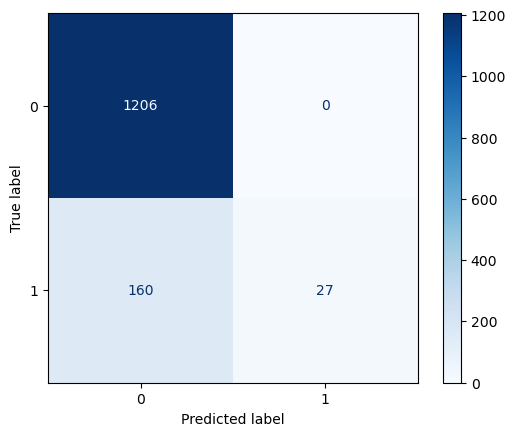

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1206
           1       1.00      0.14      0.25       187

    accuracy                           0.89      1393
   macro avg       0.94      0.57      0.60      1393
weighted avg       0.90      0.89      0.85      1393



In [42]:
# Parameter skews for Random Forest model, trigrams pipeline

print_test_stats_header()

for i in [None, 100, 75, 50, 25, 20, 15]:
    rf = RandomForestClassifier(max_depth=i, n_estimators=250)
    
    pipe_rf = Pipeline(steps=[
        ('preprocessor_trigrams', preprocess_test),
        ('random_forest_classifier', rf)
    ])
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),
                                                        df['target'],
                                                        test_size=0.25,
                                                        random_state=42,
                                                        stratify=df['target']
                                                       )
    
    # Run Pipeline
    pipe_rf.fit(X_train, y_train)
    test_pred = pipe_rf.predict(X_test)
    train_pred = pipe_rf.predict(X_train)
    
    # Stats
    print_test_stats(pipe_rf[1], y_test, test_pred, y_train, train_pred)

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, test_pred))


| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |
-------------------------------------------------------------------------------------------------------------
 | GradientBoostingClassifier(max_depth=50, n_estimators=250)       | 0.937 | 0.797 | 0.861 | 0.966 | 1.000 | 
 | GradientBoostingClassifier(max_depth=25, n_estimators=250)       | 0.945 | 0.829 | 0.883 | 0.971 | 1.000 | 
 | GradientBoostingClassifier(max_depth=20, n_estimators=250)       | 0.945 | 0.829 | 0.883 | 0.971 | 1.000 | 
 | GradientBoostingClassifier(max_depth=15, n_estimators=250)       | 0.945 | 0.829 | 0.883 | 0.971 | 1.000 | 
 | GradientBoostingClassifier(max_depth=10, n_estimators=250)       | 0.945 | 0.829 | 0.883 | 0.971 | 1.000 | 


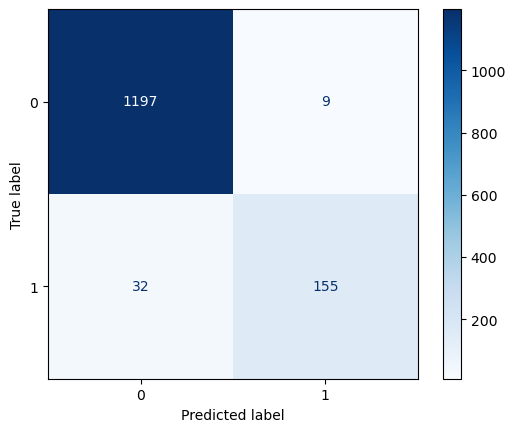

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1206
           1       0.95      0.83      0.88       187

    accuracy                           0.97      1393
   macro avg       0.96      0.91      0.93      1393
weighted avg       0.97      0.97      0.97      1393



In [43]:
# Parameter skews for Gradient Boost model, trigrams pipeline

print_test_stats_header()

for i in [50, 25, 20, 15, 10]:
    grad = GradientBoostingClassifier(max_depth=i, n_estimators=250)
    
    pipe_grad = Pipeline(steps=[
        ('preprocessor_trigrams', preprocess_test),
        ('grad_boost_classifier', grad)
    ])
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),
                                                        df['target'],
                                                        test_size=0.25,
                                                        random_state=42,
                                                        stratify=df['target']
                                                       )
    
    # Run Pipeline
    pipe_grad.fit(X_train, y_train)
    test_pred = pipe_grad.predict(X_test)
    train_pred = pipe_grad.predict(X_train)
    
    # Stats
    print_test_stats(pipe_grad[1], y_test, test_pred, y_train, train_pred)

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, test_pred))

In [59]:
# 5x model stability test for optimized models with chat GPT pipeline
# Add loop to test standard pipeline against trigrams pipeline
# Generate data for ROC

models = {
    'dt': DecisionTreeClassifier(max_depth=20),
    'lr': LogisticRegression(class_weight='balanced', C=0.5),
    'rf  ': RandomForestClassifier(max_depth=100, n_estimators=250),
    'grad': GradientBoostingClassifier(max_depth=15, n_estimators=250)
}

preprocess_transformers = {
    'preprocessor': preprocess,
    'preprocessor_trigrams': preprocess_test
}

results_list = []
roc_dataset = []

print_test_stats_header()


for i in range(1):
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),
                                                                df['target'],
                                                                test_size=0.25,
                                                                stratify=df['target']
                                                       )
    for pp_name, pp_transformer in preprocess_transformers.items():
        for name, model in models.items():
            pipe = Pipeline(steps=[
                (pp_name, pp_transformer),
                (name, model)
            ])    
    
            # Run Pipeline
            pipe.fit(X_train, y_train)
            test_pred = pipe.predict(X_test)
            train_pred = pipe.predict(X_train)
            
            
            # Stats
            print_test_stats(pipe[1], y_test, test_pred, y_train, train_pred) if i==0 else ''
    
            results_list.append([str(pipe[1]),
                                 str(pp_transformer),
                                 precision_score(y_test, test_pred),
                                 recall_score(y_test, test_pred),
                                 f1_score(y_test, test_pred),
                                 accuracy_score(y_test, test_pred),
                                 f1_score(y_train, train_pred)
                            ])

            #ROC
            if i == 0:
                y_pred_proba = pipe.predict_proba(X_test)[:, 1]
                fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
                auc_test = roc_auc_score(y_test, y_pred_proba)
                roc_dataset.append([str(pipe[1]) + ' ' + str(pp_transformer), fpr, tpr, thresholds, auc_test])

result_df = pd.DataFrame(results_list, columns=['Model', 'Vectorize', 'Precision', 'Recall', 'F1_Test', 'Accuracy', 'F1_Train'])

result_df.groupby(['Model', 'Vectorize']).agg(['mean', 'std']).style.format(precision=3)



| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |
-------------------------------------------------------------------------------------------------------------
 | DecisionTreeClassifier(max_depth=20)                             | 0.969 | 0.829 | 0.893 | 0.973 | 0.938 | 
 | LogisticRegression(C=0.5, class_weight='balanced')               | 0.977 | 0.920 | 0.948 | 0.986 | 0.991 | 
 | RandomForestClassifier(max_depth=100, n_estimators=250)          | 1.000 | 0.840 | 0.913 | 0.978 | 0.998 | 
 | GradientBoostingClassifier(max_depth=15, n_estimators=250)       | 0.982 | 0.872 | 0.924 | 0.981 | 1.000 | 
 | DecisionTreeClassifier(max_depth=20)                             | 0.975 | 0.818 | 0.890 | 0.973 | 0.941 | 
 | LogisticRegression(C=0.5, class_weight='balanced')               | 0.971 | 0.882 | 0.924 | 0.981 | 0.998 | 
 | RandomForestClassifier(max_depth=100, n_estimators=250)          | 1.000 | 0.743 | 0.853 | 0.966 | 0.986 | 
 |

In [94]:
# Run dummy classifier for ROC curve

clf = DummyClassifier(strategy='stratified')
pipe = Pipeline(steps=[
    ('preprocessor', preprocess),
    ('dummy_classifier', clf)
])

pipe.fit(X_train, y_train)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_test = roc_auc_score(y_test, y_pred_proba)
roc_dataset.append([str(pipe[1]), fpr, tpr, thresholds, auc_test])

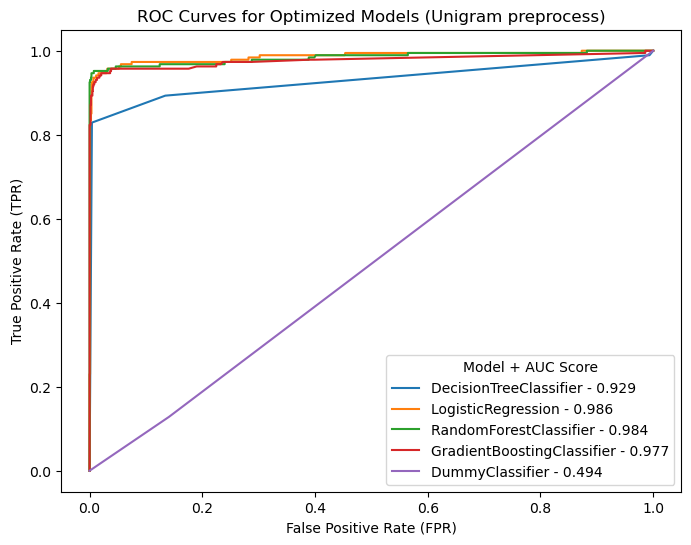

In [109]:
# Plot ROC Curve

plt.figure(figsize=(8, 6))
for roc_param in roc_dataset:
    if 'ngram' in roc_param[0]:
        continue
    label = ''.join(roc_param[0].split('(')[:1]) + ' - ' + str(round(roc_param[4],3))
    plt.plot(roc_param[1], roc_param[2], label=label)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(title='Model + AUC Score')
plt.title('ROC Curves for Optimized Models (Unigram preprocess)')
plt.savefig('roc.png');
plt.show()